### Exoplanet Hunting Project
---
The purpose of this project is to use the NASA provided dataset from [Kaggle](https://www.kaggle.com/keplersmachines/kepler-labelled-time-series-data) and build a model to identify stars with possible exoplanets based on time-series light flux intensity data.

In [40]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [20]:
train = pd.read_csv("./data/exoTrain.csv")
test = pd.read_csv("./data/exoTest.csv")

In [21]:
train.shape

(5087, 3198)

In [22]:
test.shape

(570, 3198)

In [23]:
train.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [15]:
test.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,119.88,100.21,86.46,48.68,46.12,39.39,18.57,6.98,6.63,...,14.52,19.29,14.44,-1.62,13.33,45.50,31.93,35.78,269.43,57.72
1,2,5736.59,5699.98,5717.16,5692.73,5663.83,5631.16,5626.39,5569.47,5550.44,...,-581.91,-984.09,-1230.89,-1600.45,-1824.53,-2061.17,-2265.98,-2366.19,-2294.86,-2034.72
2,2,844.48,817.49,770.07,675.01,605.52,499.45,440.77,362.95,207.27,...,17.82,-51.66,-48.29,-59.99,-82.10,-174.54,-95.23,-162.68,-36.79,30.63
3,2,-826.00,-827.31,-846.12,-836.03,-745.50,-784.69,-791.22,-746.50,-709.53,...,122.34,93.03,93.03,68.81,9.81,20.75,20.25,-120.81,-257.56,-215.41
4,2,-39.57,-15.88,-9.16,-6.37,-16.13,-24.05,-0.90,-45.20,-5.04,...,-37.87,-61.85,-27.15,-21.18,-33.76,-85.34,-81.46,-61.98,-69.34,-17.84


In [24]:
print(train['LABEL'].value_counts())
print(test['LABEL'].value_counts())

1    5050
2      37
Name: LABEL, dtype: int64
1    565
2      5
Name: LABEL, dtype: int64


In [42]:
train.iloc[35:40,:]

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
35,2,22.82,46.37,39.61,98.75,81.32,100.43,65.00,38.86,22.11,...,55.50,-16.22,-5.21,15.04,11.86,-5.38,-24.46,-55.86,-44.55,-16.80
36,2,26.24,42.32,28.34,24.81,49.39,47.57,41.52,51.80,25.50,...,-7.53,-35.72,-14.32,-29.21,-30.61,8.49,4.75,6.59,-7.03,24.41
37,1,-141.22,-81.79,-52.28,-32.45,-1.55,-35.61,-23.28,19.45,53.11,...,-50.79,-22.34,-36.23,27.44,13.52,38.66,-17.53,31.49,31.38,50.03
38,1,-35.62,-28.55,-27.29,-28.94,-15.13,-51.06,2.67,-5.21,9.67,...,-43.98,-38.22,-46.23,-54.40,-23.51,-26.96,-3.95,-0.34,10.52,-7.69
39,1,142.40,137.03,93.65,105.64,98.22,99.06,86.40,60.78,45.18,...,-0.99,-3.03,-30.27,-24.22,-35.10,-39.64,23.78,23.40,-0.50,0.97


As you can see, both the train and test data is **extremely** unbalanced. I can either use SMOTE or bootstrapping to overcome this issue. But for now, I will look at some feature engineering with the flux data.

In [25]:
star_mean = train.apply('mean', axis=1)
star_median = train.apply('median', axis=1)
star_stdev = train.apply('std', axis=1)

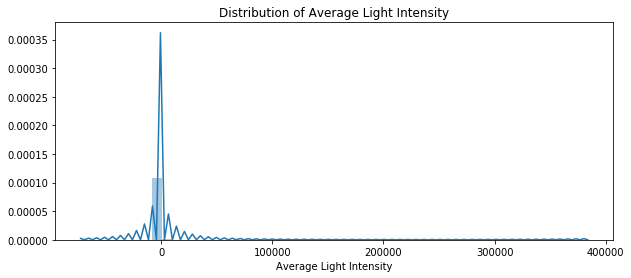

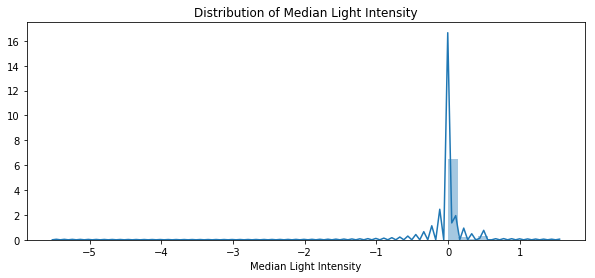

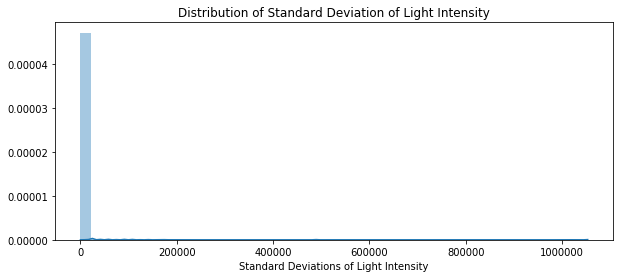

In [32]:
plt.figure(figsize=(10,4))
sns.distplot(star_mean)
plt.title('Distribution of Average Light Intensity')
plt.xlabel('Average Light Intensity')
plt.show()

plt.figure(figsize=(10,4))
sns.distplot(star_median)
plt.title('Distribution of Median Light Intensity')
plt.xlabel('Median Light Intensity')
plt.show()

plt.figure(figsize=(10,4))
sns.distplot(star_stdev)
plt.title('Distribution of Standard Deviation of Light Intensity')
plt.xlabel('Standard Deviations of Light Intensity')
plt.show()

In [51]:
exoplanet_means = train[train.LABEL == 2].apply('mean', axis=1)
non_exoplanet_means = train[train.LABEL == 1].apply('mean', axis=1)

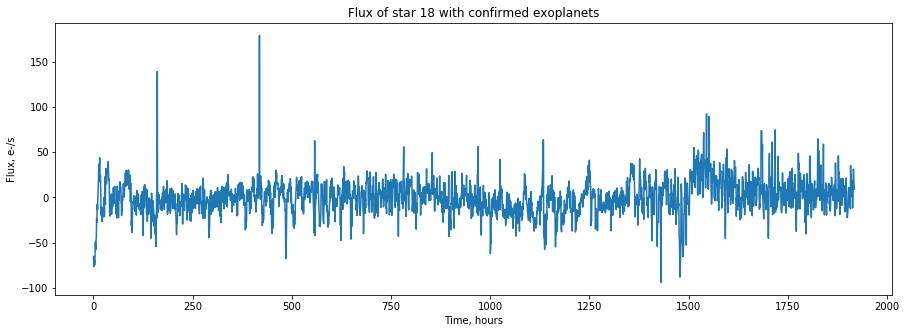

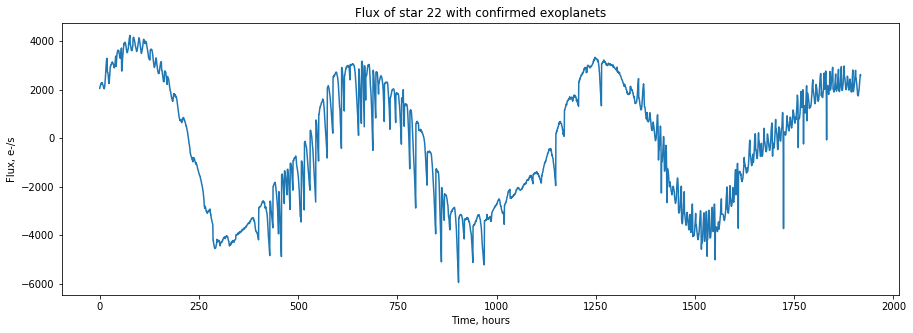

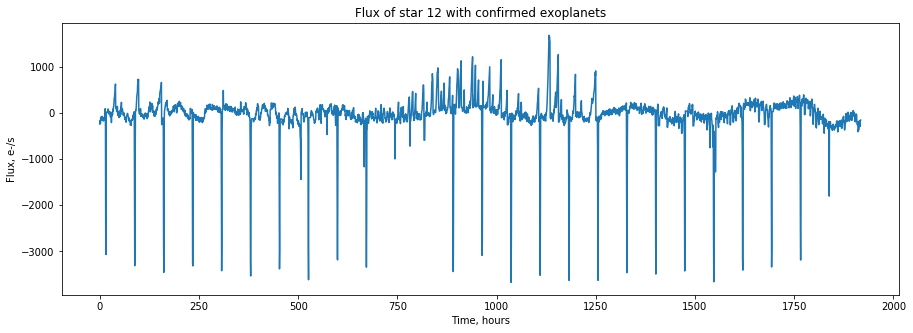

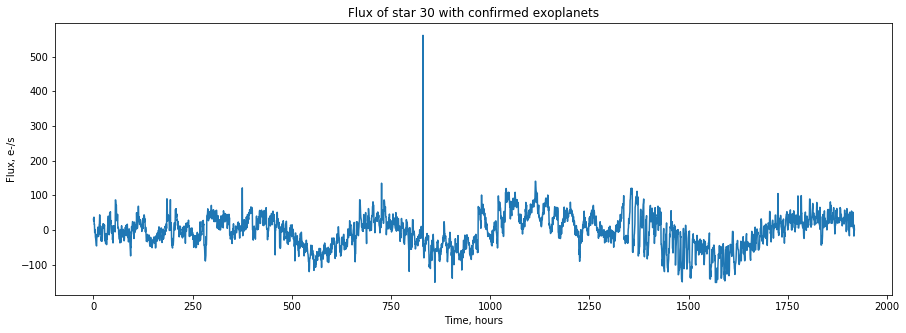

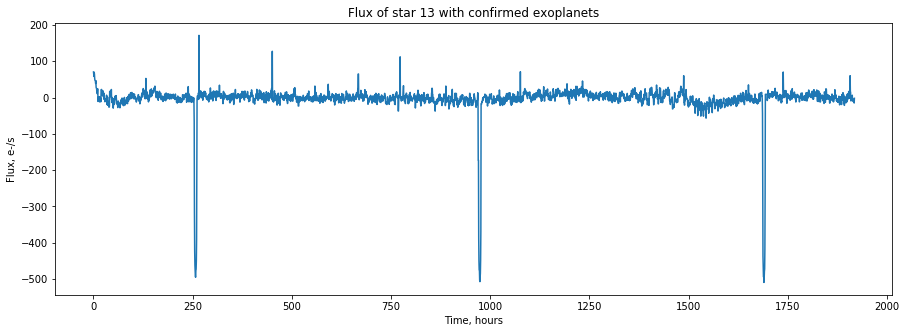

In [68]:
# Obtaining flux for several stars with exoplanets from the train data:
for i in np.random.choice(range(0, len(train[train.LABEL == 2])), size=5):
    flux = train[train.LABEL == 2].drop('LABEL', axis=1).iloc[i,:]
    time = np.arange(len(flux)) * (36.0/60.0) # time in units of hours
    plt.figure(figsize=(15,5))
    plt.title('Flux of star {} with confirmed exoplanets'.format(i+1))
    plt.ylabel('Flux, e-/s')
    plt.xlabel('Time, hours')
    plt.plot(time, flux)

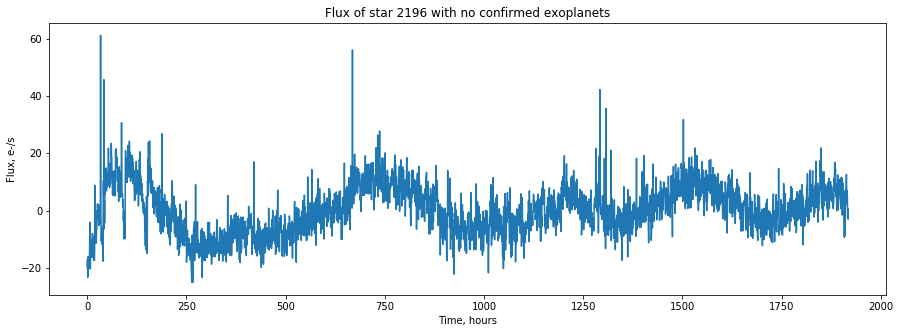

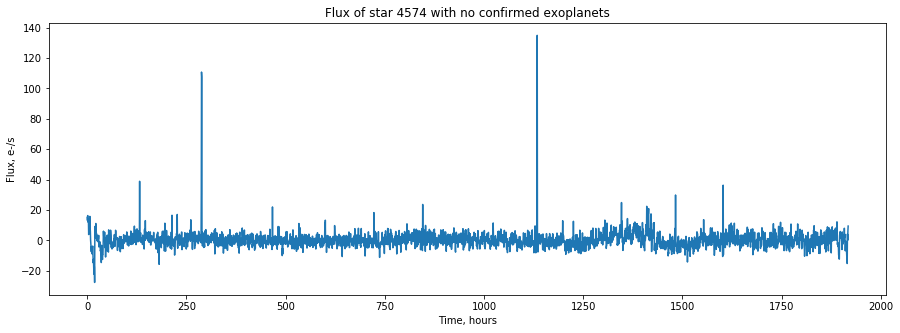

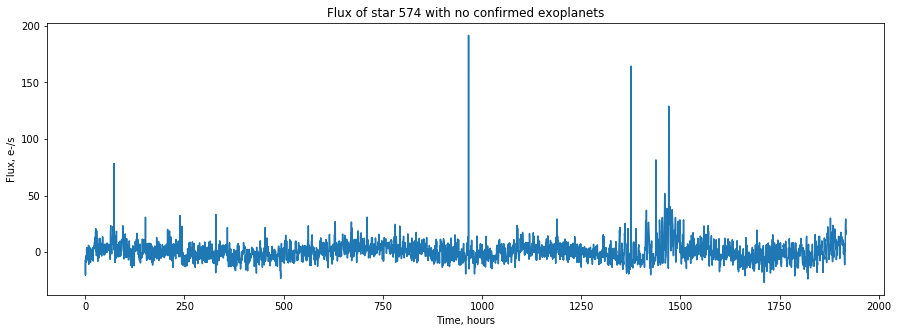

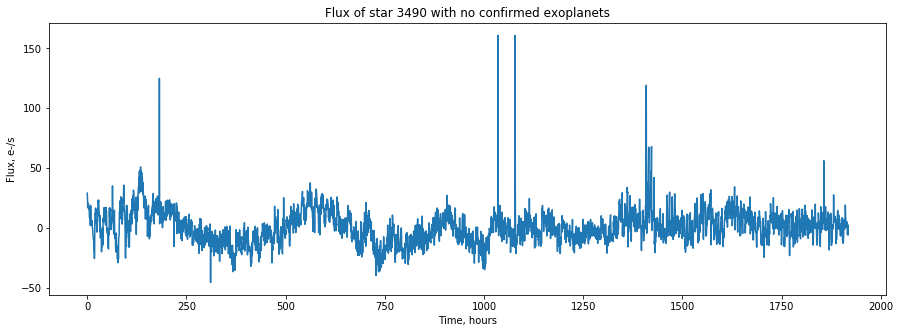

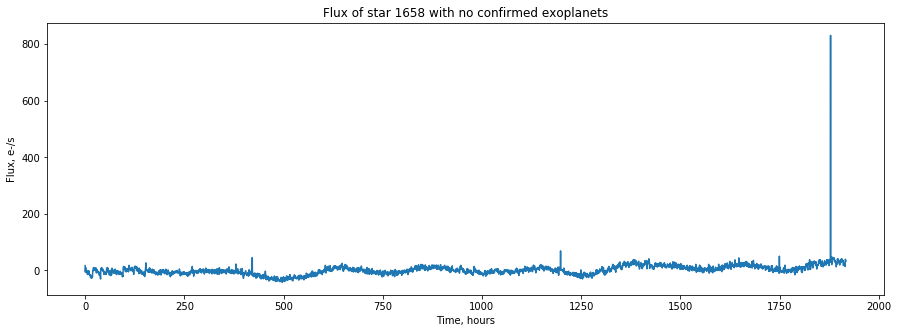

In [69]:
# Obtaining flux for several stars with NO exoplanets from the train data:
for i in np.random.choice(range(0, len(train[train.LABEL == 1])), size=5):
    flux = train[train.LABEL == 1].drop('LABEL', axis=1).iloc[i,:]
    time = np.arange(len(flux)) * (36.0/60.0) # time in units of hours
    plt.figure(figsize=(15,5))
    plt.title('Flux of star {} with no confirmed exoplanets'.format(i+1))
    plt.ylabel('Flux, e-/s')
    plt.xlabel('Time, hours')
    plt.plot(time, flux)